In [1]:
import torch
import pandas as pd
from tqdm.auto import tqdm

/home/hrenduchinta/LM-pretraining/ingenious-env/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
def intersection_cnt(folder):
    subsets=[]
    for i in range(0, 225, 25):
        if i==0:
            subsets.append(set(torch.load(folder+"subset_indices_after_step_0.pt").tolist()))
        else:
            subsets.append(set(torch.load(folder+f"subset_indices_after_step_{i}000.pt").tolist()))
    df=pd.DataFrame()
    df["subsets"]=["{}K".format(i) for i in range(0, 225, 25)]
    for i in range(0, 225, 25):
        df["{}K".format(i)]=[0 for j in range(0, 225, 25)]
    df.set_index("subsets", inplace=True)
    pbar=tqdm(range(45))
    for i in range(0, 225, 25):
        for j in range(i, 225, 25):
            df["{}K".format(i)]["{}K".format(j)]=len(subsets[i//25].intersection(subsets[j//25]))
            pbar.update(1)
    print("Union")
    s=subsets[0]
    print(len(subsets[0]))
    for i in range(1, len(subsets)):
        s=s.union(subsets[i])
        print(len(s))
    print("Intersection")
    s=subsets[0]
    print(len(subsets[0]))
    for i in range(1, len(subsets)):
        s=s.intersection(subsets[i])
        print(len(s))
    return df

# Random-Online

In [12]:
folder="subsets/random_25percent_bert_25_05_2022_06:08:15/"
df=intersection_cnt(folder)
df.to_csv("random-online.csv")

100%|██████████| 45/45 [00:46<00:00,  1.03it/s]

Union
10385854
18177160
24022707
28403717
31687992
34152079
36000178
37384279
38423412
Intersection
10385854
2594548
648115
162102


100%|██████████| 45/45 [01:33<00:00,  2.07s/it]

40729
10266
2542
642
189


# LogDet Layer 6

In [19]:
folder="subsets/logdet_25percent_bert_22_05_2022_21:09:35/"
df=intersection_cnt(folder)
df.to_csv("logdet_25percent.csv")

Union
10385854
18176443
21505680
23454654
24776422
25744906
26482003
27079830
27561599
Intersection
10385854
2599411
1488223
1061822
823583
664576
550625
463140
395166


100%|██████████| 45/45 [01:56<00:00,  2.60s/it]


# Graph Cut Layer 6

In [20]:
folder="subsets/gc_25percent_layer6/"
df=intersection_cnt(folder)
df.to_csv("graphcut_25percent_layer6.csv")

Union
10385854
18183378
21343618
23075156
24223948
25055224
25685101
26183701
26573916
Intersection
10385854
2592476
1541958
1066625
786289
604191
476880
384910
316877


100%|██████████| 45/45 [01:56<00:00,  2.58s/it]


# Facility Location Layer 3 (No Warmstart)

In [14]:
folder="subsets/fl_25percent_layer3_bert_26_05_2022_06:17:56/"
df=intersection_cnt(folder)
df.to_csv("fl_25percent_layer3.csv")

Union
10385854
18177994
22870409
25976851
28190602
29841357
31135259
32155981
32989102
Intersection
10385854
2597860
1032596
545628
338829
230278
164780


100%|██████████| 45/45 [01:41<00:00,  2.26s/it]

123517
94853


# Facility Location Layer 6 (No Warmstart)

In [18]:
folder="subsets/fl_25percent_layer6/"
subsets=[]
for i in range(25, 225, 25):
    if i==0:
        subsets.append(set(torch.load(folder+"subset_indices_after_step_0.pt").tolist()))
    else:
        subsets.append(set(torch.load(folder+f"subset_indices_after_step_{i}000.pt").tolist()))
df=pd.DataFrame()
df["subsets"]=["{}K".format(i) for i in range(25, 225, 25)]
for i in range(25, 225, 25):
    df["{}K".format(i)]=[0 for j in range(25, 225, 25)]
df.set_index("subsets", inplace=True)
pbar=tqdm(range(36))
for i in range(25, 225, 25):
    for j in range(25, 225, 25):
        df["{}K".format(i)]["{}K".format(j)]=len(subsets[(i//25)-1].intersection(subsets[(j//25)-1]))
        pbar.update(1)
df.to_csv("fl_25percent_layer6.csv")
print("Union")
s=subsets[0]
print(len(subsets[0]))
for i in range(1, len(subsets)):
    s=s.union(subsets[i])
    print(len(s))
print("Intersection")
s=subsets[0]
print(len(subsets[0]))
for i in range(1, len(subsets)):
    s=s.intersection(subsets[i])
    print(len(s))

Union
10390000
17120914
21718096
24949856
27300507
29068610
30446444
31541533
Intersection
10390000
3659086
1716877
986536
642986
450717
331918
252879


# Facility Location Layer 9 (No Warmstart)

In [17]:
folder="subsets/fl_25percent_layer9_bert_28_05_2022_04:44:02/"
df=intersection_cnt(folder)
df.to_csv("fl_25percent_layer9.csv")

Union
10385854
18179515
23490753
27234384
29958610
31989995
33551224
34755645
35716426
Intersection
10385854
2596339
826062
320709
148289
80103
48220
31562
22067


100%|██████████| 45/45 [01:37<00:00,  2.16s/it]


# Facility Location Layer 9 (With Warmstart)

In [10]:
folder="subsets/fl_25percent_layer9_warmstart_bert_30_05_2022_15:43:16/"
intersection_cnt(folder)

100%|██████████| 45/45 [01:00<00:00,  1.35s/it]


,0K,25K,50K,75K,100K,125K,150K,175K,200K
subsets,,,,,,,,,
0K,10390000,0,0,0,0,0,0,0,0
25K,3389216,10390000,0,0,0,0,0,0,0
50K,3395593,3476906,10390000,0,0,0,0,0,0
75K,3397162,3476054,3494979,10390000,0,0,0,0,0
100K,3395021,3475155,3495194,3493634,10390000,0,0,0,0
125K,3397162,3475996,3496397,3494863,3494817,10390000,0,0,0
150K,3395835,3478228,3496200,3495732,3496007,3495133,10390000,0,0
175K,3395781,3478866,3493653,3492484,3493851,3496591,3495338,10390000,0
200K,3398343,3478149,3495074,3494185,3493536,3497500,3493596,3495591,10390000


In [12]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [17]:
step=[]
perplexity=[]
with open("logs/fl_25percent_layer9_bert_logs_28_05_2022_04:44:02/train_logs.log", "r") as f:
    for line in f:
        if "perplexity" in line:
            lst=line.split(" ")
            step.append(int(lst[-3].rstrip(":")))
            perplexity.append(float(lst[-1]))

In [18]:
step_warmstart=[]
perplexity_warmstart=[]
with open("logs/fl_25percent_layer9_warmstart_bert_logs_30_05_2022_15:43:16/train_logs.log", "r") as f:
    for line in f:
        if "perplexity" in line:
            lst=line.split(" ")
            step_warmstart.append(int(lst[-3].rstrip(":")))
            perplexity_warmstart.append(float(lst[-1]))

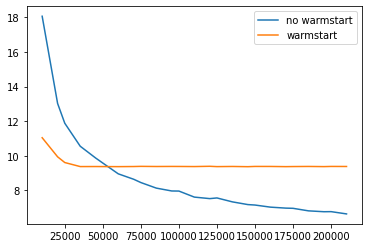

In [20]:
plt.plot(step, perplexity)
plt.plot(step_warmstart, perplexity_warmstart)
plt.legend(["no warmstart", "warmstart"])